# Pyber Ride Sharing

### Analysis

- My biggest takeaway from the weather data is from the City Latitude vs. Max Temperature plot. Conventional wisdom would suggest that cities along the equator would be the hottest. However, the plot suggests that max temperature actually peaks somewhere in between 10 and 15 degrees north of the equator.


- I would also expect cities near the poles to be the coldest, and this is true. In the plot, it may appear that cities near the north pole are actually significantly colder than those near the south pole. I don't believe this is true. Instead, there is a higher volume of northern cities which skews the appearance of the plot.


- The area highlighted in my first point above also represents another interesting trend. Cities with low humidity are somewhat prevalent outside the 10-15 degrees-north-of-the-equator range (on both sides), but not within that range. This tells me that max temperature and humidity are likely correlated, though asserting that definitively would require more analysis.

In [18]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from citipy import citipy
import requests
import time

# Google API Key + Geocoding/Places URLs
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_key = "appid=0d99449d7128437ead7d88097c7ac304&q="

### Generate Cities List

In [19]:
# Get List filled with random unique city names
cities = []
lat =[]
lng = []
countries = []

# Need a way to drop the lat/lng of duplicate cities

for x in range(0, 1500):
    latitude = random.uniform(-90,90)
    longitude = random.uniform(-180,180)
    if (citipy.nearest_city(latitude, longitude).city_name in cities) == False:
        cities.append(citipy.nearest_city(latitude, longitude).city_name)
        countries.append(citipy.nearest_city(latitude, longitude).country_code)
        lat.append(latitude)
        lng.append(longitude)
        
len(cities)

613

In [20]:
# Create DataFrame from city name List with empty weather data columns
city_data = pd.DataFrame(cities)
city_data.columns = ["City"]
city_data["Country"] = countries
city_data["Cloudiness"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = lat
city_data["Lng"] = lng
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""

city_data.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mabaruma,gy,,,,9.137290,-59.148327,,
1,butaritari,ki,,,,17.029502,169.006132,,
2,albany,au,,,,-65.509853,114.406913,,
3,khatanga,ru,,,,78.051246,100.307766,,
4,faanui,pf,,,,-9.732412,-156.053334,,


In [26]:
# Fill Weather Data for each city
counter = 0

print("Beginning Data Retrieval")
print("------------------------")

for index, row in city_data.iterrows():
    try:
        city_url = weather_url + weather_key + row["City"]
        print("Processing Record " + str(counter+1) + " of " + str(len(city_data)) + " | " + row["City"])
        print(city_url)
        city_response = requests.get(city_url)
        city_json = city_response.json()
        city_data.set_value(counter, "Cloudiness", city_json["clouds"]["all"])
        city_data.set_value(counter, "Date", city_json["dt"])
        city_data.set_value(counter, "Humidity", city_json["main"]["humidity"])
        city_data.set_value(counter, "Max Temp", city_json["main"]["temp_max"])
        city_data.set_value(counter, "Wind Speed", city_json["wind"]["speed"])
        counter = counter + 1
        time.sleep(.1)
    except:
        print("Error: skip city and continue")
        counter = counter + 1
    
city_data.head()

Beginning Data Retrieval
------------------------
Processing Record 1 of 613 | mabaruma
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mabaruma
Processing Record 2 of 613 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=butaritari
Processing Record 3 of 613 | albany
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=albany
Processing Record 4 of 613 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=khatanga
Processing Record 5 of 613 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=faanui
Processing Record 6 of 613 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kahului
Processing Record 7 of 613 | khuzhir
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=khuzhir
Processing Re

Processing Record 63 of 613 | villazon
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=villazon
Processing Record 64 of 613 | samarai
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=samarai
Processing Record 65 of 613 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=cape town
Processing Record 66 of 613 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kruisfontein
Processing Record 67 of 613 | clyde river
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=clyde river
Processing Record 68 of 613 | bariri
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=bariri
Processing Record 69 of 613 | partizanskoye
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=partizanskoye
Processing Record 70 of 613 

Processing Record 123 of 613 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mount gambier
Processing Record 124 of 613 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=victoria
Processing Record 125 of 613 | mwinilunga
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mwinilunga
Processing Record 126 of 613 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=amderma
Processing Record 127 of 613 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=hofn
Processing Record 128 of 613 | ardesen
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=ardesen
Processing Record 129 of 613 | kursenai
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=kursenai
Processing Record 130 of 613 | loei
htt

Processing Record 183 of 613 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=lagoa
Processing Record 184 of 613 | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=yeppoon
Processing Record 185 of 613 | alghero
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=alghero
Processing Record 186 of 613 | drayton valley
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=drayton valley
Processing Record 187 of 613 | east london
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=east london
Processing Record 188 of 613 | camalu
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=camalu
Processing Record 189 of 613 | inderborskiy
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=inderborskiy
Processing Record 190 of 613 

Processing Record 242 of 613 | hay river
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=hay river
Processing Record 243 of 613 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=port lincoln
Processing Record 244 of 613 | tarko-sale
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=tarko-sale
Processing Record 245 of 613 | mount pleasant
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mount pleasant
Processing Record 246 of 613 | dauriya
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=dauriya
Processing Record 247 of 613 | hanyang
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=hanyang
Processing Record 248 of 613 | adre
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=adre
Processing Record 249 of 61

Processing Record 302 of 613 | mosalsk
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mosalsk
Processing Record 303 of 613 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=constitucion
Processing Record 304 of 613 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=saldanha
Processing Record 305 of 613 | balykshi
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=balykshi
Processing Record 306 of 613 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=komsomolskiy
Processing Record 307 of 613 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=sitka
Processing Record 308 of 613 | gilgit
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=gilgit
Processing Record 309 of 613 | grand-

Processing Record 362 of 613 | manoel urbano
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=manoel urbano
Processing Record 363 of 613 | rincon
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=rincon
Processing Record 364 of 613 | stawell
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=stawell
Processing Record 365 of 613 | troitsko-pechorsk
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=troitsko-pechorsk
Processing Record 366 of 613 | nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=nelson bay
Processing Record 367 of 613 | lugovoy
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=lugovoy
Processing Record 368 of 613 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=emerald
Processing Record 3

Processing Record 422 of 613 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=mitsamiouli
Processing Record 423 of 613 | nanton
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=nanton
Processing Record 424 of 613 | devonport
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=devonport
Processing Record 425 of 613 | batticaloa
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=batticaloa
Processing Record 426 of 613 | vitim
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=vitim
Processing Record 427 of 613 | berbera
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=berbera
Processing Record 428 of 613 | ekhabi
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=ekhabi
Processing Record 429 of 613 | mukhen
http://

Processing Record 482 of 613 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=flinders
Processing Record 483 of 613 | chulucanas
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=chulucanas
Processing Record 484 of 613 | longlac
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=longlac
Processing Record 485 of 613 | yozgat
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=yozgat
Processing Record 486 of 613 | grajau
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=grajau
Processing Record 487 of 613 | denpasar
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=denpasar
Processing Record 488 of 613 | bandar
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=bandar
Processing Record 489 of 613 | tadine
http://api.op

Processing Record 542 of 613 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=ambilobe
Processing Record 543 of 613 | majene
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=majene
Processing Record 544 of 613 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=lavrentiya
Processing Record 545 of 613 | huarmey
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=huarmey
Processing Record 546 of 613 | ruteng
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=ruteng
Processing Record 547 of 613 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=vestmannaeyjar
Processing Record 548 of 613 | sibu
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=sibu
Processing Record 549 of 613 | batagay-alyt

Processing Record 603 of 613 | argos
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=argos
Processing Record 604 of 613 | tracy
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=tracy
Processing Record 605 of 613 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=lorengau
Processing Record 606 of 613 | carauari
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=carauari
Processing Record 607 of 613 | pandharpur
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=pandharpur
Processing Record 608 of 613 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=zhezkazgan
Processing Record 609 of 613 | luvianos
http://api.openweathermap.org/data/2.5/weather?appid=0d99449d7128437ead7d88097c7ac304&q=luvianos
Processing Record 610 of 613 | bukama
http://

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mabaruma,gy,48,1505426356,76,9.137290,-59.148327,302.71,3.65
1,butaritari,ki,80,1505426356,100,17.029502,169.006132,302.31,7.2
2,albany,au,75,1505422440,65,-65.509853,114.406913,299.15,2.1
3,khatanga,ru,8,1505426357,88,78.051246,100.307766,275.76,4.9
4,faanui,pf,0,1505426357,100,-9.732412,-156.053334,299.21,8


In [32]:
# Convert Temp
city_data["Max Temp"] = city_data["Max Temp"] * 9/5 - 459.67

# Break out Series for plots
lats = city_data.iloc[:, 5]
lngs = city_data.iloc[:, 6]
temps = city_data.iloc[:, 7]
winds = city_data.iloc[:, 8]
humids = city_data.iloc[:, 4]
clouds = city_data.iloc[:, 2]

### Latitude vs. Temperature Plot

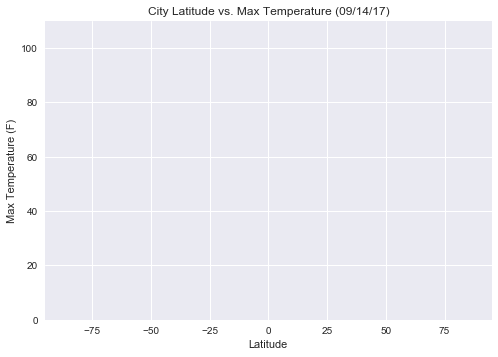

In [33]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, temps, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Max Temperature (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.xlim(-95,95)
plt.ylim(0,110)
plt.savefig("Resources/Latitude_MaxTemperature.png")
plt.show()

### Latitude vs. Humidity Plot

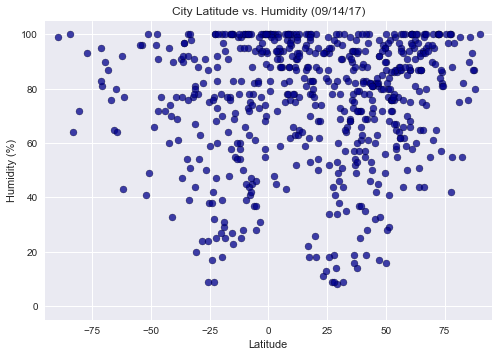

In [34]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, humids, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Humidity (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-95,95)
plt.ylim(-5,105)
plt.savefig("Resources/Latitude_Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

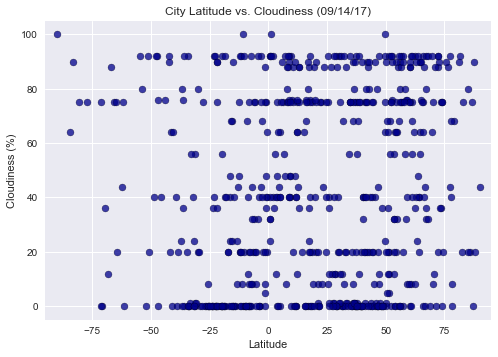

In [35]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, clouds, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Cloudiness (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-95,95)
plt.ylim(-5,105)
plt.savefig("Resources/Latitude_Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

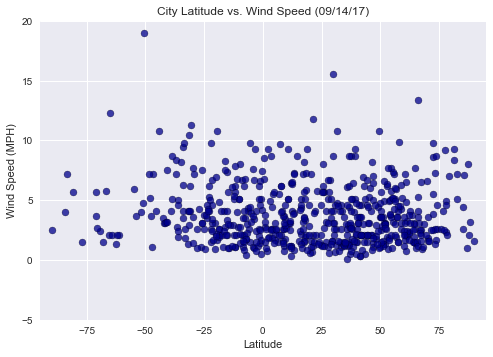

In [37]:
# Initialize plot + format the scatter
fig, ax = plt.subplots()
ax.scatter(lats, winds, alpha=0.75, facecolor="darkblue", edgecolors="black")

# Format and print the full plot
plt.title("City Latitude vs. Wind Speed (09/14/17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.xlim(-95,95)
plt.ylim(-5,20)
plt.savefig("Resources/Latitude_WindSpeed.png")
plt.show()